Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 6, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [1]:
# YOUR CODE HERE

## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

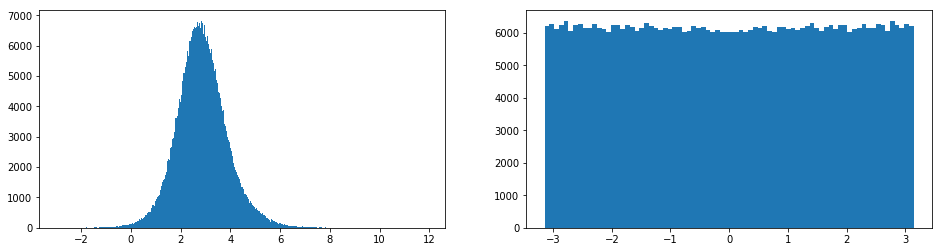

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
fourier = np.fft.fft2(img)

plt.subplots(1,2,figsize=(16, 4))
plt.subplot(121)
plt.hist(np.log(np.abs(fourier.flat)), bins="auto")
plt.subplot(122)
plt.hist(np.angle(fourier.flat), bins="auto")

plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

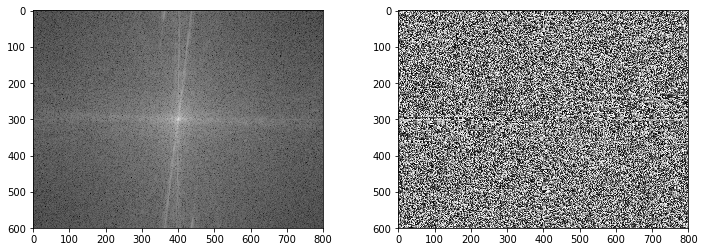

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
fourier = np.fft.fftshift(np.fft.fft2(img))

plt.subplots(1,2,figsize=(12, 4))
plt.subplot(121)
plt.imshow(np.log(np.abs(fourier)), cmap="gray")
plt.subplot(122)
plt.imshow(np.angle(fourier), cmap="gray")

plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

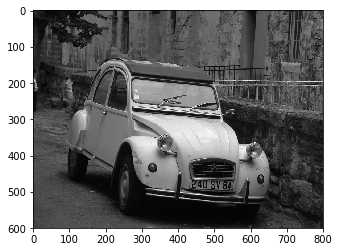

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
fourier = np.fft.fft2(img)
new_img = np.fft.fft2(fourier)

# The image is rotated by 180 degrees because we used the same function to transform it back.
# You would need to use the inverse function of it
# Also the result consists of complex numbers, so you need to take the absolute of it first.
plt.imshow(np.rot90(np.abs(new_img), 2), cmap="gray")

plt.show()

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

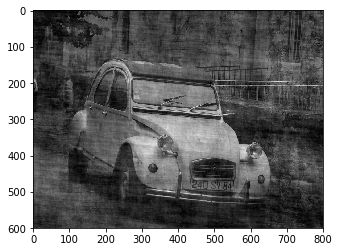

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# YOUR CODE HERE
fourier = np.fft.fft2(img)
amplitude = np.abs(fourier)
# add some noise to the phase
noisy_phase = np.angle(fourier) + np.random.rand(*fourier.shape) * 2
new_img = np.abs(np.fft.ifft2(amplitude * np.exp(1j * noisy_phase)))

plt.imshow(new_img, cmap="gray")

plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


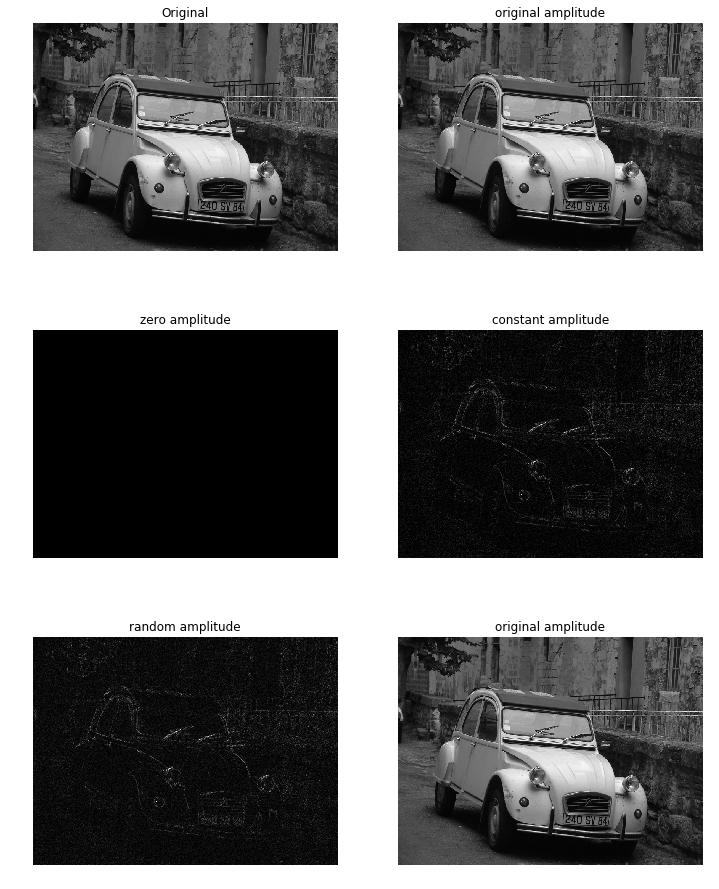

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

An amplitude of zero only takes the phase, so the angle into account. But since the direction is clear, but the length is 0, the image remains black.
Constant and random amplitudes give (false) information about the strength of a signal. But since it is present, the correct angles are displayed and the outlines of the original picture are visible.

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

Fourier transform translates the image into a representation with basis functions of sine and cosine functions.  
The frequency space is the representation of the different frequencies that make up a signal.  
A point in the frequence space represents the amount of a specific frequency that is present in the signal.

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

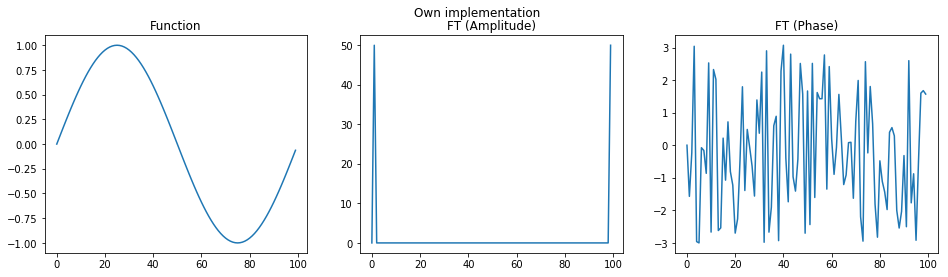

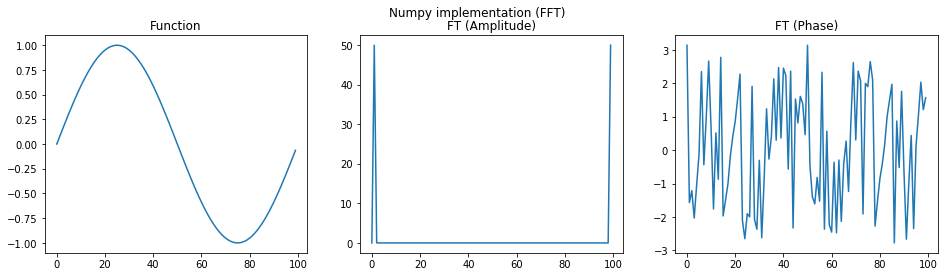

In [7]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=np.complex)

    # YOUR CODE HERE
    L = len(func)
    X = np.arange(L)
    
    for n in range(L):
        #ft[n] = sum(func[x] * np.exp(-2 * np.pi * 1j * n * x / L) for x in range(L))
        ft[n] = np.sum(func * np.exp(-2 * np.pi * 1j * n * X / L))

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(16, 4))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(16, 4))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

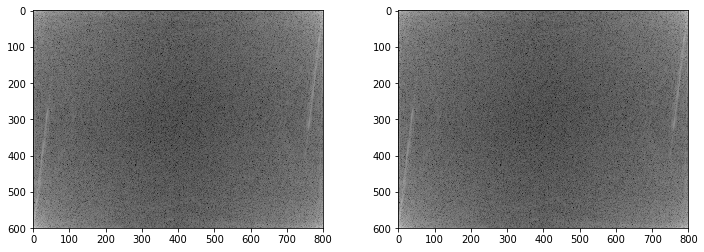

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    """

    ft = np.zeros(img.shape)

    # YOUR CODE HERE
    Fx = np.apply_along_axis(fourier1d, 1, img)
    ft = np.apply_along_axis(fourier1d, 0, Fx)

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# YOUR CODE HERE
plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(121)
plt.imshow(np.log(np.abs(fourier2d(img))), cmap="gray")
plt.subplot(122)
plt.imshow(np.log(np.abs(np.fft.fft2(img))), cmap="gray")


plt.show()

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

YOUR ANSWER HERE

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

YOUR ANSWER HERE

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).

YOUR ANSWER HERE

**d)** Proof the convolution theorem.

YOUR ANSWER HERE

## Exercise 4: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

In [9]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

YOUR ANSWER HERE